# Training

Firstly, I tried choosing parameters by hand because I want to obtain some insights of how lightgbm behave , because I set up a **virtual machine** which give me several advantages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
from multiprocessing import Pool
import xgboost as xgb
import lightgbm as lgbm
from itertools import product
from sklearn.externals import joblib
import pickle
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

In [2]:
test = pd.read_csv('test.csv')
X_train = pd.read_csv('X_train.csv')
X_cv = pd.read_csv('X_cv_v2.csv')
X_test = pd.read_csv('X_test.csv')

I set these parameters manually it gives me good results, even after hyperopt optimization

In [3]:
cols = [c for c in X_train.columns if c not in ['date_block_num', 'item_cnt_day','item_category_name','month','year','item_clean']]

In [4]:

X_train_ = X_train[cols]
y_train_ = X_train['item_cnt_day']
X_valid = X_cv[cols]
y_valid = X_cv['item_cnt_day']

## LightGbm

### parameters

In [12]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_iterations':500,
    'num_leaves': 40,
    'learning_rate': 0.03,
    'feature_fraction': 0.6,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

num_round = 40

In [13]:
d_train = lgbm.Dataset(X_train_, label=y_train_)
d_valid = lgbm.Dataset(X_valid, label=y_valid)

In [14]:
model = lgbm.train(params, d_train, num_round, valid_sets=d_valid, early_stopping_rounds=150)

[1]	valid_0's rmse: 1.38282
Training until validation scores don't improve for 150 rounds.
[2]	valid_0's rmse: 1.36828
[3]	valid_0's rmse: 1.35632
[4]	valid_0's rmse: 1.34348
[5]	valid_0's rmse: 1.33129
[6]	valid_0's rmse: 1.32142
[7]	valid_0's rmse: 1.31077
[8]	valid_0's rmse: 1.30173
[9]	valid_0's rmse: 1.29214
[10]	valid_0's rmse: 1.28555
[11]	valid_0's rmse: 1.27793
[12]	valid_0's rmse: 1.2692
[13]	valid_0's rmse: 1.26202
[14]	valid_0's rmse: 1.25442
[15]	valid_0's rmse: 1.2481
[16]	valid_0's rmse: 1.24138
[17]	valid_0's rmse: 1.23625
[18]	valid_0's rmse: 1.23115
[19]	valid_0's rmse: 1.22572
[20]	valid_0's rmse: 1.22106
[21]	valid_0's rmse: 1.21751
[22]	valid_0's rmse: 1.21479
[23]	valid_0's rmse: 1.21089
[24]	valid_0's rmse: 1.20657
[25]	valid_0's rmse: 1.20256
[26]	valid_0's rmse: 1.20124
[27]	valid_0's rmse: 1.19776
[28]	valid_0's rmse: 1.19468
[29]	valid_0's rmse: 1.19433
[30]	valid_0's rmse: 1.1912
[31]	valid_0's rmse: 1.18889
[32]	valid_0's rmse: 1.1865
[33]	valid_0's rmse: 1

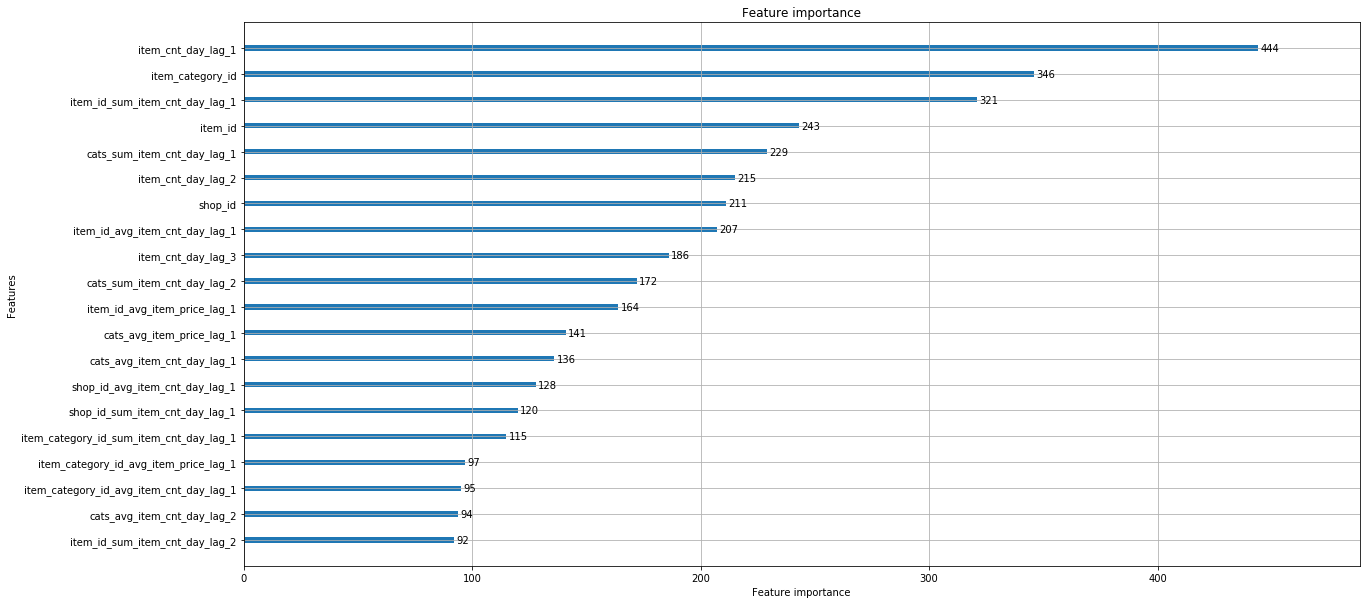

In [8]:
lgbm.plot_importance(model, figsize=(20,10), max_num_features=20)

## Saving model

In [32]:
name_model = "light_gbm_v1"
joblib.dump(model, name_model+'.pkl')

['light_gbm_v1.pkl']

## Prediction

I decide to clip the results from 0  to 20,  I take this piece of advice by checking other kernels

In [16]:
pred = model.predict(X_test[cols])

test['item_cnt_month'] = pred.clip(0,20)
#test.drop(['shop_id', 'item_id'], axis=1, inplace=True)
test.to_csv('submission_lgbm6.csv', index=False)

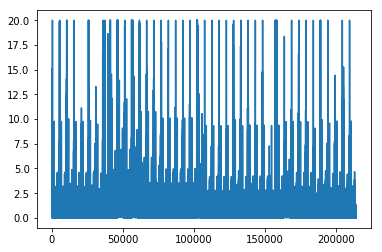

In [17]:
test.item_cnt_month.plot()

# Final thoughts

By increasing **num_leaves** and **num_iterations** give good results.
My score was **93.02** then I tried averaging with ohers submissions but didn't work as thought.
So I decided to keep this as my final solution.

### Early stopping, best iteration is:

. [64]	valid_0's rmse: 1.13848

In [39]:
submit =  pd.read_csv("submission_lgbm4.csv")

In [14]:
submit.head()

,ID,item_cnt_month
0,0,20.0
1,1,20.0
2,2,20.0
3,3,20.0
4,4,20.0


### Distribution of the predictions along the index

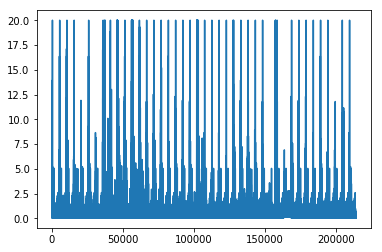

In [40]:
submit.item_cnt_month.plot()